In [1]:
from netCDF4 import Dataset
import colorcet as cc
import cmocean.cm as cmo
import numpy as np
import salem
import xarray as xr
from matplotlib.cm import get_cmap

import cartopy.crs as crs
import matplotlib.pyplot as plt

In [2]:
wur_file = salem.open_wrf_dataset('/home/cdonnely/Urban-M4/misc/workflows/snakemake/output/wur_1h/wrfout_test')
wur_lcz_file = salem.open_wrf_dataset('/home/cdonnely/Urban-M4/misc/workflows/snakemake/output/wur_lcz_1h/wrfout_test')


wur_file

<xarray.Dataset> Size: 10GB
Dimensions:                (south_north: 165, west_east: 220, time: 45,
                            bottom_top: 60, soil_layers: 3, seed_dim: 7)
Coordinates:
    lat                    (south_north, west_east) float32 145kB 52.29 ... 5...
    lon                    (south_north, west_east) float32 145kB 4.728 ... 5...
    xtime                  (time) datetime64[ns] 360B ...
  * time                   (time) datetime64[ns] 360B 2019-07-23T06:00:00 ......
  * west_east              (west_east) float64 2kB -8.411e+04 ... -6.221e+04
  * south_north            (south_north) float64 1kB 3.535e+04 ... 5.175e+04
Dimensions without coordinates: bottom_top, soil_layers, seed_dim
Data variables: (12/211)
    LU_INDEX               (time, south_north, west_east) float32 7MB ...
    ZNU                    (time, bottom_top) float32 11kB ...
    ZNW                    (time, bottom_top) float32 11kB ...
    ZS                     (time, soil_layers) float32 540B ...
    DZS                    (time, soil_layers) float32 540B ...
    VAR_SSO                (time, south_north, west_east) float32 7MB ...
    ...                     ...
    PRESSURE               (time, bottom_top, south_north, west_east) float32 392MB ...
    GEOPOTENTIAL           (time, bottom_top, south_north, west_east) float32 392MB ...
    Z                      (time, bottom_top, south_north, west_east) float32 392MB ...
    SLP                    (time, south_north, west_east) float32 7MB ...
    PRCP_NC                (time, south_north, west_east) float32 7MB ...
    PRCP_C                 (time, south_north, west_east) float32 7MB ...
Attributes: (12/137)
    TITLE:                            OUTPUT FROM WRF V4.6.0 MODEL
    START_DATE:                      2019-07-23_06:00:00
    SIMULATION_START_DATE:           2019-07-23_06:00:00
    WEST-EAST_GRID_DIMENSION:        221
    SOUTH-NORTH_GRID_DIMENSION:      166
    BOTTOM-TOP_GRID_DIMENSION:       61
    ...                              ...
    ISICE:                           24
    ISURBAN:                         1
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2
    pyproj_srs:                      +proj=lcc +lat_0=51.9647178649902 +lon_0...

In [3]:
# Open variables

wur_u10 = wur_file.U10.isel(time=34)
wur_v10 = wur_file.V10.isel(time=34)
wur_pblh = wur_file.PBLH.isel(time=34)

wur_lcz_u10 = wur_lcz_file.U10.isel(time=34)
wur_lcz_v10 = wur_lcz_file.V10.isel(time=34)
wur_lcz_pblh = wur_lcz_file.PBLH.isel(time=34)

wur_ws = np.sqrt(wur_u10**2 + wur_v10**2)
wur_lcz_ws = np.sqrt(wur_lcz_u10**2 + wur_lcz_v10**2)

wur_lcz_pblh

<xarray.DataArray 'PBLH' (south_north: 165, west_east: 220)> Size: 145kB
[36300 values with dtype=float32]
Coordinates:
    lat          (south_north, west_east) float32 145kB 52.29 52.29 ... 52.44
    lon          (south_north, west_east) float32 145kB 4.728 4.73 ... 5.056
    xtime        datetime64[ns] 8B ...
    time         datetime64[ns] 8B 2019-07-24T16:00:00
  * west_east    (west_east) float64 2kB -8.411e+04 -8.401e+04 ... -6.221e+04
  * south_north  (south_north) float64 1kB 3.535e+04 3.545e+04 ... 5.175e+04
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  PBL HEIGHT
    units:        m
    stagger:      
    pyproj_srs:   +proj=lcc +lat_0=51.9647178649902 +lon_0=6 +lat_1=30 +lat_2...

In [4]:
ax_options = {
    'color': 'black',
    'linestyle': 'dotted',
    'linewidth': 0.5,
    'zorder': 103,
    'draw_labels': True,
    'x_inline': False,
    'y_inline': False,
}
title_options = {
    'loc': 'left',
    'fontsize': 'x-large',
    'fontweight': 'bold',
}
proj = crs.PlateCarree()
extent = [wur_ws.lon.min(), wur_ws.lon.max(), wur_ws.lat.min(), wur_ws.lat.max()]

In [5]:
lw = 5*wur_lcz_ws / wur_lcz_ws.max()

lw

<xarray.DataArray (south_north: 165, west_east: 220)> Size: 290kB
array([[2.90194801, 2.92438883, 3.06409567, ..., 4.27662187, 4.27874131,
        4.28183239],
       [3.00208673, 3.0289211 , 3.02676241, ..., 4.5636044 , 4.30840473,
        4.31227689],
       [2.82292853, 2.84359281, 3.00821522, ..., 4.31108918, 4.31388166,
        4.58107459],
       ...,
       [2.89025335, 2.94363792, 2.99525768, ..., 4.71216409, 4.36458681,
        4.38600835],
       [2.76805579, 2.81828301, 2.87289153, ..., 4.36707733, 4.38940811,
        4.41032637],
       [2.75885332, 2.8084283 , 2.86119754, ..., 4.06945231, 4.08614948,
        4.1041008 ]])
Coordinates:
    lat          (south_north, west_east) float32 145kB 52.29 52.29 ... 52.44
    lon          (south_north, west_east) float32 145kB 4.728 4.73 ... 5.056
    xtime        datetime64[ns] 8B 2019-07-24T16:00:00
    time         datetime64[ns] 8B 2019-07-24T16:00:00
  * west_east    (west_east) float64 2kB -8.411e+04 -8.401e+04 ... -6.221e+04
  * south_north  (south_north) float64 1kB 3.535e+04 3.545e+04 ... 5.175e+04

/scratch-local/cdonnely/ipykernel_1452086/3091336873.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  wur_lcz_ws.lon, wur_lcz_ws.lat, wur_lcz_ws, vmin=2.5, vmax=5.5, cmap=get_cmap("cet_kbc"), transform=crs.PlateCarree()
/scratch-local/cdonnely/ipykernel_1452086/3091336873.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  wur_ws.lon, wur_ws.lat, wur_ws, vmin=2.5, vmax=5.5, cmap=get_cmap("cet_kbc"), transform=crs.PlateCarree()


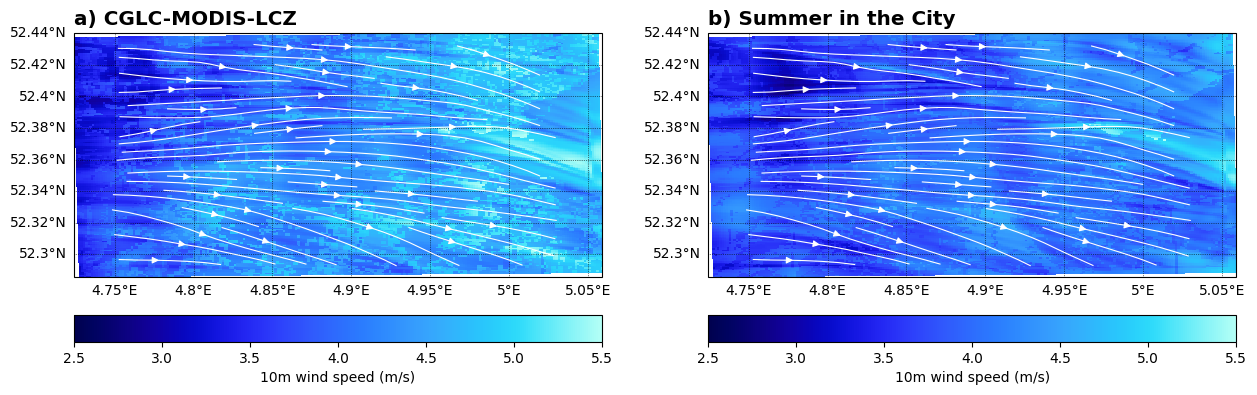

In [8]:


fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1, projection=proj)
gl1 = ax1.gridlines(**ax_options)
gl1.right_labels = False
gl1.top_labels = False
ax1.set_extent(extent)
ct1 = ax1.pcolormesh(
    wur_lcz_ws.lon, wur_lcz_ws.lat, wur_lcz_ws, vmin=2.5, vmax=5.5, cmap=get_cmap("cet_kbc"), transform=crs.PlateCarree()
)

Q = ax1.streamplot(wur_u10.lon, wur_u10.lat,
          wur_u10, wur_v10,
          transform=crs.PlateCarree(), density=[0.6,1], color='white', linewidth=0.8
          )

#contours = plt.contour(wur_lcz_pblh.lon, wur_lcz_pblh.lat, wur_lcz_pblh,
#                       levels=[0,200,400,600], colors="black",
#                       transform=crs.PlateCarree())
#plt.clabel(contours, inline=1, fontsize=12, fmt="%i")

ax1.coastlines(linewidth=1.0, resolution='10m')
ax1.set_title('a) CGLC-MODIS-LCZ', **title_options)
cbar = fig.colorbar(ct1, orientation='horizontal', fraction=0.09, pad=0.1, label='10m wind speed (m/s)', ax=ax1)
cbar.set_ticks([2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5])
cbar.set_ticklabels(['2.5', '3.0', '3.5', '4.0', '4.5', '5.0', '5.5'])

ax2 = fig.add_subplot(1, 2, 2, projection=proj)
gl2 = ax2.gridlines(**ax_options)
gl2.right_labels = False
gl2.top_labels = False
ax2.set_extent(extent)
ct2 = ax2.pcolormesh(
    wur_ws.lon, wur_ws.lat, wur_ws, vmin=2.5, vmax=5.5, cmap=get_cmap("cet_kbc"), transform=crs.PlateCarree()
)

Q2 = ax2.streamplot(wur_u10.lon, wur_u10.lat,
          wur_u10, wur_v10,
          transform=crs.PlateCarree(), density=[0.6,1], color='white', linewidth=0.8
          )

ax2.coastlines(linewidth=1.0, resolution='10m')
ax2.set_title('b) Summer in the City', **title_options)
cbar = fig.colorbar(ct2, orientation='horizontal', fraction=0.09, pad=0.1, label='10m wind speed (m/s)', ax=ax2)
cbar.set_ticks([2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5])
cbar.set_ticklabels(['2.5', '3.0', '3.5', '4.0', '4.5', '5.0', '5.5'])

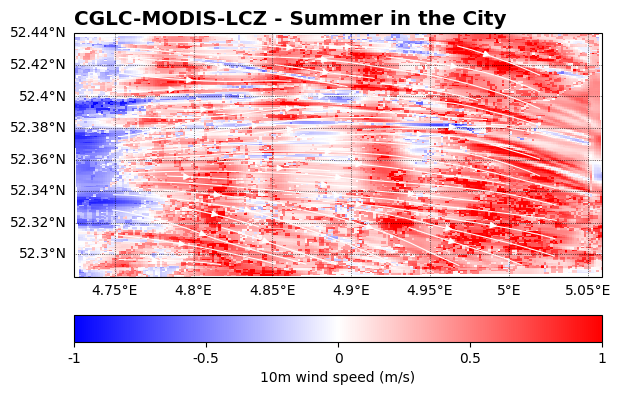

In [7]:
diff = wur_lcz_ws - wur_ws

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1, projection=proj)
gl1 = ax1.gridlines(**ax_options)
gl1.right_labels = False
gl1.top_labels = False
ax1.set_extent(extent)
ct1 = ax1.pcolormesh(
    wur_lcz_ws.lon, wur_lcz_ws.lat, diff, vmin=-1, vmax=1, cmap='bwr', transform=crs.PlateCarree()
)

Q = ax1.streamplot(wur_u10.lon, wur_u10.lat,
          wur_u10, wur_v10,
          transform=crs.PlateCarree(), density=[0.6,1], color='white', linewidth=0.8
          )

ax1.coastlines(linewidth=1.0, resolution='10m')
ax1.set_title('CGLC-MODIS-LCZ - Summer in the City', **title_options)
cbar = fig.colorbar(ct1, orientation='horizontal', fraction=0.09, pad=0.1, label='10m wind speed (m/s)', ax=ax1)
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
cbar.set_ticklabels(['-1', '-0.5', '0', '0.5', '1'])